In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="urllib3")
# Setting the working directory
import os
os.chdir('/Users/vishalraj/GitHub/Flight_Fare_Prediction')

In [3]:
from src.data.make_dataset import load_and_save_data_by_folder

path = 'data/raw'

# Load and save concatenated data by folder
load_and_save_data_by_folder(path)

In [3]:
import pandas as pd
df = pd.read_csv("data/interim/ATL/ATL_concatenated.csv")
print(df.head())

                              legId  searchDate  flightDate startingAirport  \
0  ee4aaff43c557e1704ebf52b8abf25ad  2022-05-13  2022-06-15             ATL   
1  284bffb121ffdafba55f69d6d89a4b7d  2022-05-13  2022-06-15             ATL   
2  8efdd07b82644146d45978f61d081f3b  2022-05-13  2022-06-15             ATL   
3  e03c8964b4feb4e206636a9c5c0015b2  2022-05-13  2022-06-15             ATL   
4  f44658d6761962cecc3eabc0a29d6ef9  2022-05-13  2022-06-15             ATL   

  destinationAirport travelDuration  isBasicEconomy  isRefundable  isNonStop  \
0                BOS        PT8H51M           False         False      False   
1                BOS       PT12H31M           False         False      False   
2                BOS        PT4H35M           False         False      False   
3                BOS        PT4H38M           False         False      False   
4                BOS        PT6H43M           False         False      False   

   totalFare  ...  segmentsArrivalTimeEpochS

In [3]:
# Extract dtypes
dtype_dict = df.dtypes.to_dict()

print(dtype_dict)

{'legId': dtype('O'), 'searchDate': dtype('O'), 'flightDate': dtype('O'), 'startingAirport': dtype('O'), 'destinationAirport': dtype('O'), 'travelDuration': dtype('O'), 'isBasicEconomy': dtype('bool'), 'isRefundable': dtype('bool'), 'isNonStop': dtype('bool'), 'totalFare': dtype('float64'), 'totalTravelDistance': dtype('float64'), 'segmentsDepartureTimeEpochSeconds': dtype('O'), 'segmentsDepartureTimeRaw': dtype('O'), 'segmentsArrivalTimeEpochSeconds': dtype('O'), 'segmentsArrivalTimeRaw': dtype('O'), 'segmentsArrivalAirportCode': dtype('O'), 'segmentsDepartureAirportCode': dtype('O'), 'segmentsAirlineName': dtype('O'), 'segmentsAirlineCode': dtype('O'), 'segmentsEquipmentDescription': dtype('O'), 'segmentsDurationInSeconds': dtype('O'), 'segmentsDistance': dtype('O'), 'segmentsCabinCode': dtype('O')}


In [5]:
from src.data.data_preprocessor import DataPreprocessor

# Create an instance of the DataPreprocessor class
preprocessor = DataPreprocessor()

# Merge all datasets
preprocessor.merge_all_datasets()

# Take a 25% random sample of the merged dataset
sampled_data = preprocessor.data.sample(frac=0.25).reset_index(drop=True)

# Save the sampled dataset to a CSV file
sampled_data.to_csv('sampled_data.csv', index=False)

In [2]:
from src.data.data_preprocessor import DataPreprocessor

# Create an instance of the DataPreprocessor class
data_preprocessor = DataPreprocessor()

# Process all folders and obtain processed data, the preprocessor object, and average features directly
processed_data, preprocessor, avg_features = data_preprocessor.merge_and_preprocess_all_datasets()

# Store processed_data in a variable to use in the next cell
%store processed_data
%store preprocessor
%store avg_features

print("Checking unique values for 'startingAirport' after preprocessing:")
print(processed_data['startingAirport'].unique())

print("\nCategory Mappings:")
print(data_preprocessor.category_mappings)

Removed 185195132 duplicate rows based on the specified subset of columns
Unique values in segmentsCabinCode after split and explode:
['coach' 'premium coach' 'first' 'business']
No missing values in the processed data.
totalTravelDistance                float32
segmentsDurationInSeconds          float32
segmentsDistance                   float32
startingAirport                       int8
destinationAirport                    int8
segmentsCabinCode                     int8
flightDate_year                      int16
flightDate_month                      int8
flightDate_day                        int8
flightDate_weekday                    int8
flightDate_is_weekend               object
segmentsDepartureTimeRaw_hour         int8
segmentsDepartureTimeRaw_minute       int8
modeFare                           float32
dtype: object
Stored 'processed_data' (DataFrame)
Stored 'preprocessor' (ColumnTransformer)
Stored 'avg_features' (DataFrame)
Checking unique values for 'startingAirport' after p

In [3]:
import pandas as pd
df1 = pd.read_csv("data/processed/merged_data_processed_dl.csv")
print(df1.head(20))
print(len(df1))

    totalTravelDistance  segmentsDurationInSeconds  segmentsDistance  \
0              1.761712                  -0.369292         -0.267698   
1              1.761712                  -0.369292          0.300674   
2              1.761712                  -0.369292          1.295737   
3              1.761712                   0.154768         -0.267698   
4              1.761712                   0.154768          0.300674   
5              1.761712                   0.154768          1.295737   
6              1.761712                   1.037396         -0.267698   
7              1.761712                   1.037396          0.300674   
8              1.761712                   1.037396          1.295737   
9              1.761712                  -0.369292         -0.267698   
10             1.761712                  -0.369292          0.300674   
11             1.761712                  -0.369292          1.295737   
12             1.761712                   0.154768         -0.26

In [5]:
# Extract dtypes
dtype_dict = df1.dtypes.to_dict()

print(dtype_dict)

{'totalTravelDistance': dtype('float64'), 'segmentsDurationInSeconds': dtype('float64'), 'segmentsDistance': dtype('float64'), 'startingAirport': dtype('int64'), 'destinationAirport': dtype('int64'), 'segmentsCabinCode': dtype('int64'), 'flightDate_year': dtype('int64'), 'flightDate_month': dtype('int64'), 'flightDate_day': dtype('int64'), 'flightDate_weekday': dtype('int64'), 'flightDate_is_weekend': dtype('bool'), 'segmentsDepartureTimeRaw_hour': dtype('int64'), 'segmentsDepartureTimeRaw_minute': dtype('int64'), 'modeFare': dtype('float64')}


In [9]:
unique_values = df1['destinationAirport'].unique()
print(unique_values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [3]:
%store -r processed_data
%store -r preprocessor
%store -r avg_features

from src.models.train_model_vishal_raj import WideDeepModel

# Create an instance of WideDeepModel using processed data
flight_fare_model = WideDeepModel(processed_data, preprocessor, avg_features)

# Compute embedding sizes
flight_fare_model.compute_embedding_sizes()

# Build and compile the model
flight_fare_model.build_model()
flight_fare_model.compile_model()

# Train the model
history = flight_fare_model.train_model(epochs=50)

# Evaluate the model
rmse, mae = flight_fare_model.evaluate(batch_size=32768)

print(f"RMSE on test set: {rmse}")
print(f"MAE on test set: {mae}")

2023-11-08 19:17:25.307217: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-11-08 19:17:25.307236: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-11-08 19:17:25.307244: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-11-08 19:17:25.307298: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-08 19:17:25.307512: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2023-11-08 19:17:38.345679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-11-08 19:17:38.397206: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


889/889 [==============================] - ETA: 0s - loss: 54334.9492 - mae: 154.2171 - mse: 54334.9492INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 121s 130ms/step - loss: 54334.9492 - mae: 154.2171 - mse: 54334.9492 - val_loss: 35806.6094 - val_mae: 125.9989 - val_mse: 35806.6094 - lr: 0.0050
Epoch 2/50
888/889 [============================>.] - ETA: 0s - loss: 36191.9883 - mae: 127.0257 - mse: 36191.9883INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 112s 126ms/step - loss: 36191.6211 - mae: 127.0255 - mse: 36191.6211 - val_loss: 35576.2539 - val_mae: 125.4517 - val_mse: 35576.2539 - lr: 0.0050
Epoch 3/50
889/889 [==============================] - 111s 125ms/step - loss: 35580.6602 - mae: 125.7453 - mse: 35580.6602 - val_loss: 47722.0117 - val_mae: 153.1560 - val_mse: 47722.0117 - lr: 0.0100
Epoch 4/50
888/889 [============================>.] - ETA: 0s - loss: 33962.1055 - mae: 124.4785 - mse: 33962.1055INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 112s 126ms/step - loss: 33962.3359 - mae: 124.4788 - mse: 33962.3359 - val_loss: 32315.5371 - val_mae: 122.3777 - val_mse: 32315.5371 - lr: 0.0100
Epoch 5/50
888/889 [============================>.] - ETA: 0s - loss: 32271.5918 - mae: 123.4196 - mse: 32271.5918INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 101s 114ms/step - loss: 32271.3691 - mae: 123.4194 - mse: 32271.3691 - val_loss: 31883.7363 - val_mae: 123.4406 - val_mse: 31883.7363 - lr: 0.0100
Epoch 6/50
889/889 [==============================] - 98s 110ms/step - loss: 32269.3984 - mae: 123.5531 - mse: 32269.3984 - val_loss: 32516.7773 - val_mae: 125.2501 - val_mse: 32516.7773 - lr: 0.0100
Epoch 7/50
888/889 [============================>.] - ETA: 0s - loss: 32402.0898 - mae: 123.8131 - mse: 32402.0898INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 99s 111ms/step - loss: 32401.5098 - mae: 123.8121 - mse: 32401.5098 - val_loss: 31447.9512 - val_mae: 121.3726 - val_mse: 31447.9512 - lr: 0.0100
Epoch 8/50
889/889 [==============================] - 99s 112ms/step - loss: 32577.2617 - mae: 124.1438 - mse: 32577.2617 - val_loss: 31889.3867 - val_mae: 122.5844 - val_mse: 31889.3867 - lr: 0.0100
Epoch 9/50
888/889 [============================>.] - ETA: 0s - loss: 32716.8789 - mae: 124.4397 - mse: 32716.8789INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


INFO:tensorflow:Assets written to: models/best_model-vishal_raj/assets


889/889 [==============================] - 100s 112ms/step - loss: 32716.3770 - mae: 124.4388 - mse: 32716.3770 - val_loss: 31388.6621 - val_mae: 120.5053 - val_mse: 31388.6621 - lr: 0.0100
Epoch 10/50
889/889 [==============================] - 97s 109ms/step - loss: 33004.3320 - mae: 125.0716 - mse: 33004.3320 - val_loss: 31714.0469 - val_mae: 120.2714 - val_mse: 31714.0469 - lr: 0.0100
Epoch 11/50
889/889 [==============================] - 98s 110ms/step - loss: 33028.1602 - mae: 125.0143 - mse: 33028.1602 - val_loss: 33859.5469 - val_mae: 129.7118 - val_mse: 33859.5469 - lr: 0.0100
Epoch 12/50
191/191 [==============================] - 1s 5ms/step
RMSE on test set: 177.04859924316406
MAE on test set: 120.44410705566406


In [ ]:
# from src.models.train_model import WideDeepModel

# # Create an instance of FlightFareModel and load data
# flight_fare_model = WideDeepModel()

# # Compute embedding sizes
# flight_fare_model.compute_embedding_sizes()

# # Hyperparameter tuning
# flight_fare_model.hyperparameter_tuning(epochs=10)

# # Train the model using the best hyperparameters
# flight_fare_model.train_model(epochs=10)  # or more epochs

# # Evaluate the model
# rmse, mae = flight_fare_model.evaluate(flight_fare_model.data)

# print(f"RMSE on test set: {rmse}")
# print(f"MAE on test set: {mae}")

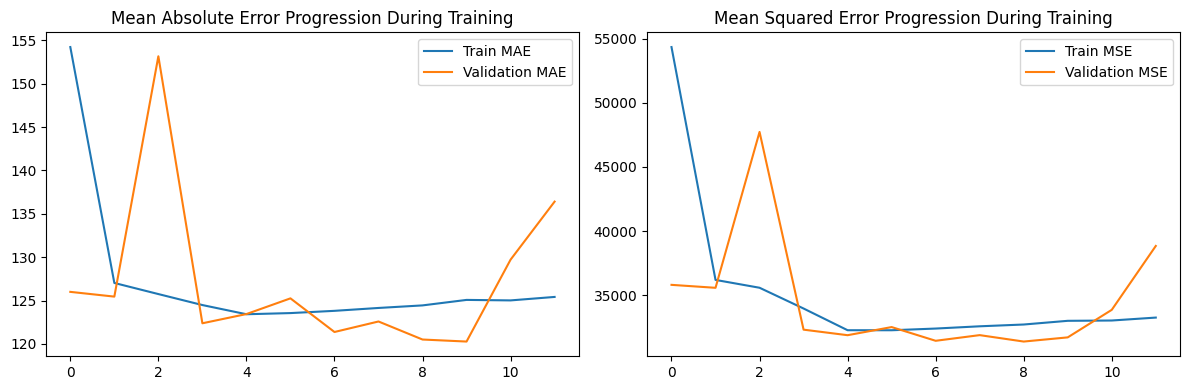

In [4]:
# Plot training history
import matplotlib.pyplot as plt

# Plot MAE and MSE
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.title('Mean Absolute Error Progression During Training')

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.legend()
plt.title('Mean Squared Error Progression During Training')

plt.tight_layout()
plt.show()